In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('walmart_data.csv')
print(raw_data.info())
print(raw_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942

In [12]:
useful_columns = ["Gender", "Age","Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]
agg_columns = {col: "first" for col in useful_columns}


by_user = raw_data.groupby("User_ID").agg({"Purchase": "sum", **agg_columns})
print(by_user.head())
print(by_user.info())

         Purchase Gender    Age  Occupation City_Category  \
User_ID                                                     
1000001    334093      F   0-17          10             A   
1000002    810472      M    55+          16             C   
1000003    341635      M  26-35          15             A   
1000004    206468      M  46-50           7             B   
1000005    821001      M  26-35          20             A   

        Stay_In_Current_City_Years  Marital_Status  
User_ID                                             
1000001                          2               0  
1000002                         4+               0  
1000003                          3               0  
1000004                          2               1  
1000005                          1               1  
<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 1000001 to 1006040
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --

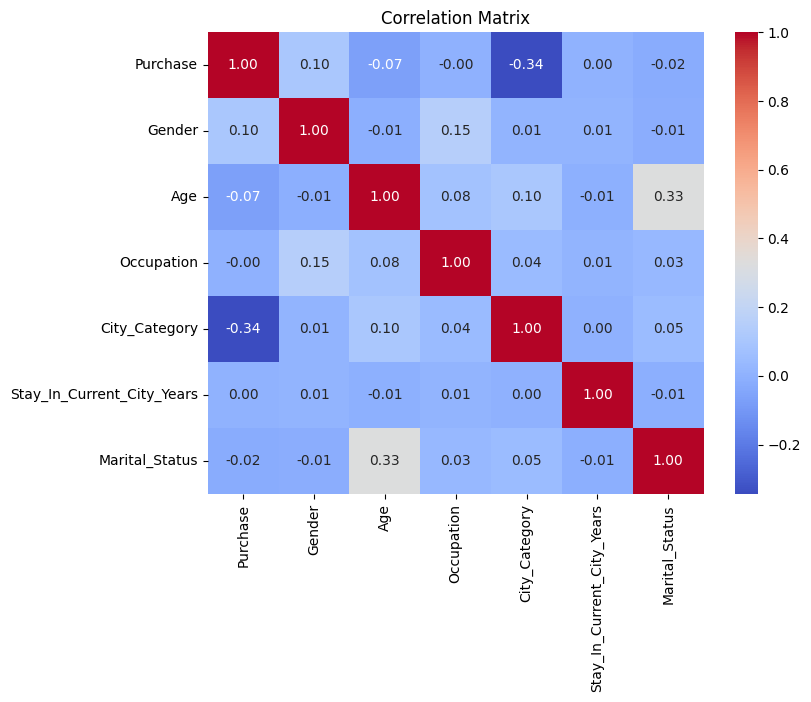

In [13]:
#encode non numerical data
label_encoder = LabelEncoder()
non_numerical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
encoded_data = by_user.copy()
for col in non_numerical_columns:
    encoded_data[col] = label_encoder.fit_transform(by_user[col])

#get correlation matrix
correlation_matrix = encoded_data.corr()

#show correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

purchase: 


<Axes: >

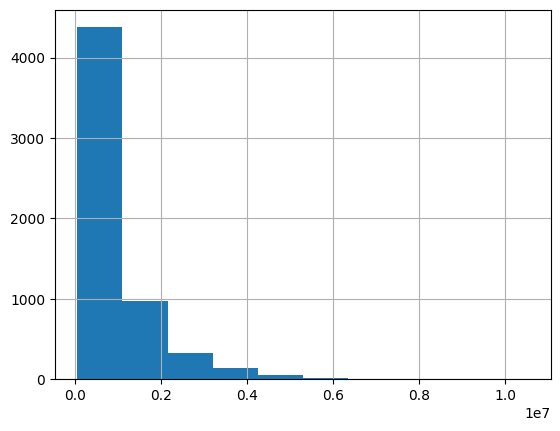

In [16]:
print("purchase: ")
by_user["Purchase"].hist()


Gender


<Axes: >

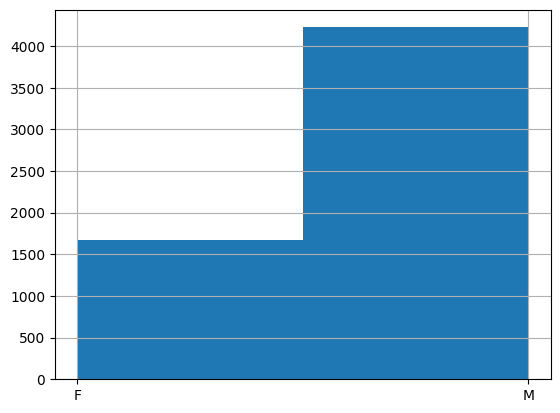

In [30]:
print("Gender")
by_user["Gender"].hist(bins=2)


Age


/tmp/ipykernel_1027/1186425495.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  age_series = age_series.replace(replace_values).astype(int).sort_values()


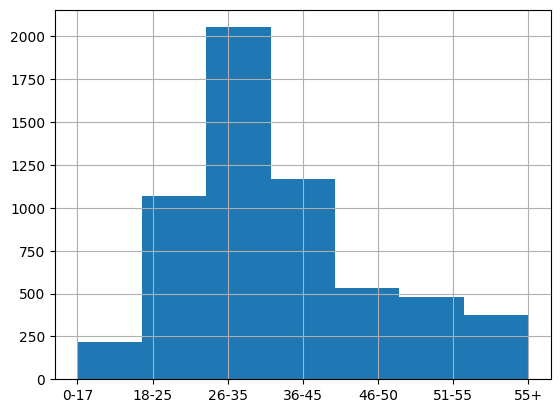

In [ ]:
print("Age")
column = "Age"
replace_values = {"0-17": 0, "18-25": 1, "26-35": 2, "36-45": 3, "46-50": 4, "51-55": 5, "55+": 6}
age_series = by_user[column].copy()
age_series = age_series.replace(replace_values).astype(int).sort_values()
age_series.hist(bins=7)
plt.xticks(ticks=range(len(replace_values)), labels=replace_values.keys())
plt.show()

Occupation


<Axes: >

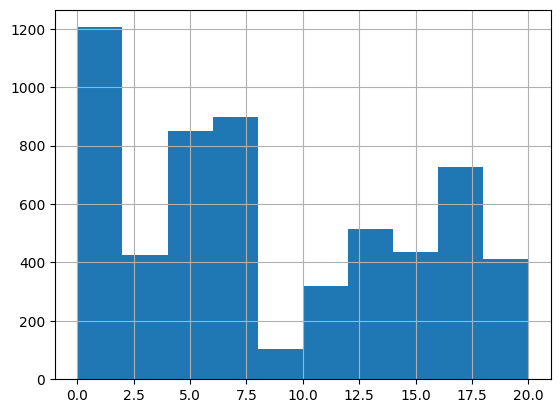

In [21]:
print("Occupation")
by_user["Occupation"].hist()

City_Category


<Axes: >

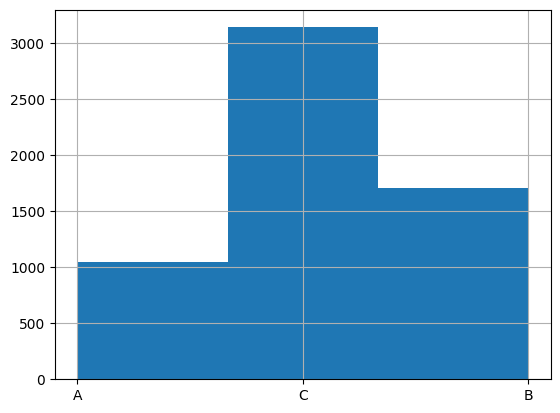

In [23]:
print("City_Category")
by_user["City_Category"].hist(bins=3)

Stay_In_Current_City_Years : 


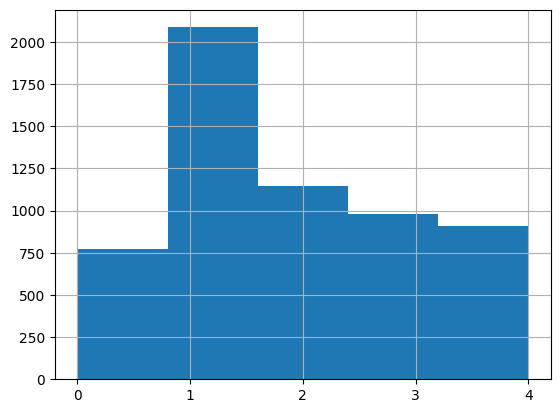

In [27]:
column = "Stay_In_Current_City_Years"
print(column, ": ")
stay_duration = by_user[column].copy()
stay_duration.replace({'4+': '4'}, inplace=True)
stay_duration = stay_duration.astype(int)
stay_duration = stay_duration.sort_values()
stay_duration.hist(bins=5)

plt.xticks(ticks=range(5), labels=by_user[column].unique().sort())
plt.show()

Marital_Status


<Axes: >

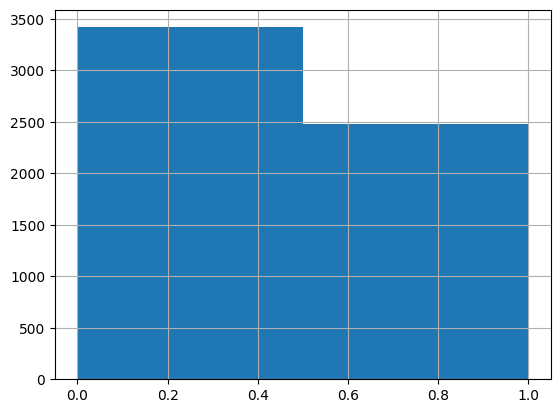

In [29]:
print("Marital_Status")
by_user["Marital_Status"].hist(bins=2)

['C' 'B' 'A' 'CC' 'BC' 'AC' 'CB']
   Purchase City_Category
0     46681             C
1     49288             C
2     49349             C
3     49668             B
4     52371             C


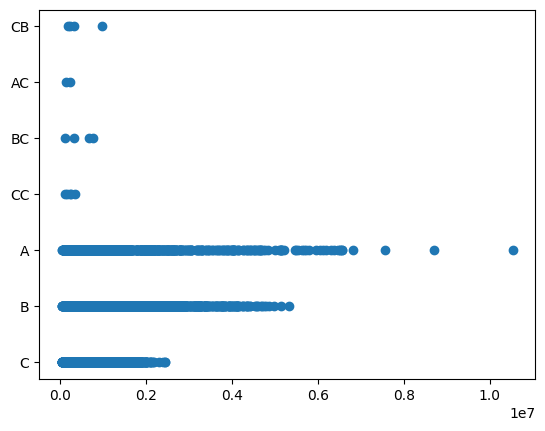

In [ ]:
# city_purchase_data = by_user[["Purchase", "City_Category"]]
# city_purchase_data = city_purchase_data.groupby("Purchase")["City_Category"].sum().reset_index()
# print(city_purchase_data["City_Category"].unique())
# print(city_purchase_data.head())
# plt.scatter(city_purchase_data["Purchase"], city_purchase_data["City_Category"])